In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

file_attached = "attached_apex.csv"
townhomes_data = pd.read_csv(file_attached)

In [2]:
townhomes_data.count()

MLS #                    1538
Status                   1538
Address                  1538
City                     1538
Zip                      1538
Closing Date             1538
Subdivision              1538
LvngAreaSF               1538
YrBlt                    1538
Beds                     1538
FBths                    1538
HBths                    1538
Property Type            1538
List Price               1538
Sold Price               1538
Days On Market           1538
HOA Y/N                  1326
Garage                   1538
Acres                    1538
Sold Price/List Price    1538
dtype: int64

In [3]:
townhomes_data.head()

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,List Price,Sold Price,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
0,2192440,CLOSED,202 Harbor Haven Drive,Apex,27502,6/28/2018,West Haven Townhomes,"1,058",2007,2,2,1,Attached,"$169,000.00","$163,000.00",2,Yes,0,0-.25 Acres,0.96
1,2173092,CLOSED,119 Halsmer Court,Apex,27502,3/15/2018,Heatherwood Townhomes,"1,275",1988,2,2,1,Attached,"$164,900.00","$164,900.00",0,Yes,0,0-.25 Acres,1.00
2,2264913,CLOSED,323 Port Haven Drive,Apex,27502,9/3/2019,West Haven Townhomes,"1,062",2007,2,1,1,Attached,"$170,900.00","$165,000.00",21,Yes,0,0-.25 Acres,0.97
3,2169851,CLOSED,315 Port Haven Drive,Apex,27502,4/6/2018,West Haven Townhomes,"1,056",2007,2,2,1,Attached,"$172,900.00","$166,000.00",36,Yes,0,0-.25 Acres,0.96
4,2280642,CLOSED,306 Port Haven Drive,Apex,27502,10/31/2019,West Haven Townhomes,"1,056",2007,2,1,1,Attached,"$169,900.00","$169,900.00",2,Yes,0,0-.25 Acres,1.00


In [4]:
townhomes_data.dtypes

MLS #                      int64
Status                    object
Address                   object
City                      object
Zip                       object
Closing Date              object
Subdivision               object
LvngAreaSF                object
YrBlt                      int64
Beds                       int64
FBths                      int64
HBths                      int64
Property Type             object
List Price                object
Sold Price                object
Days On Market             int64
HOA Y/N                   object
Garage                     int64
Acres                     object
Sold Price/List Price    float64
dtype: object

In [5]:
townhomes_df = townhomes_data.copy()
townhomes_df = townhomes_df.rename(columns={"Sold Price": "SoldPrice"})
townhomes_df = townhomes_df.rename(columns={"List Price": "ListPrice"})

#remove $
townhomes_df['SoldPrice'] = townhomes_df.SoldPrice.str.lstrip('$')
townhomes_df['ListPrice'] = townhomes_df.ListPrice.str.lstrip('$')
#remove comma
townhomes_df['SoldPrice'] = townhomes_df['SoldPrice'].str.replace(',', '').astype(float)
townhomes_df['ListPrice'] = townhomes_df['ListPrice'].str.replace(',', '').astype(float)
townhomes_df['LvngAreaSF'] = townhomes_df['LvngAreaSF'].str.replace(',', '').astype(int)
townhomes_df.head()

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
0,2192440,CLOSED,202 Harbor Haven Drive,Apex,27502,6/28/2018,West Haven Townhomes,1058,2007,2,2,1,Attached,169000.0,163000.0,2,Yes,0,0-.25 Acres,0.96
1,2173092,CLOSED,119 Halsmer Court,Apex,27502,3/15/2018,Heatherwood Townhomes,1275,1988,2,2,1,Attached,164900.0,164900.0,0,Yes,0,0-.25 Acres,1.00
2,2264913,CLOSED,323 Port Haven Drive,Apex,27502,9/3/2019,West Haven Townhomes,1062,2007,2,1,1,Attached,170900.0,165000.0,21,Yes,0,0-.25 Acres,0.97
3,2169851,CLOSED,315 Port Haven Drive,Apex,27502,4/6/2018,West Haven Townhomes,1056,2007,2,2,1,Attached,172900.0,166000.0,36,Yes,0,0-.25 Acres,0.96
4,2280642,CLOSED,306 Port Haven Drive,Apex,27502,10/31/2019,West Haven Townhomes,1056,2007,2,1,1,Attached,169900.0,169900.0,2,Yes,0,0-.25 Acres,1.00


In [6]:
townhomes_df["Subdivision"].nunique()

57

In [7]:
#scramble dataframe
random_townhomes_df = townhomes_df.sample(frac=1)
random_townhomes_df

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
681,2342599,CLOSED,529 Old Mill Village Drive,Apex,27502,10/28/2020,Old Mill Village,1849,2014,3,2,1,Attached,289900.0,293000.0,2,Yes,2,0-.25 Acres,1.01
684,2268776,CLOSED,820 Richmont Grove Lane,Apex,27523,12/9/2019,Townes at North Salem,1984,2018,4,3,1,Attached,299900.0,293000.0,0,Yes,2,0-.25 Acres,0.98
451,2295559,CLOSED,852 New Derby Lane,Apex,27523,3/5/2020,Salem Pointe,1792,2017,2,2,1,Attached,274800.0,274800.0,16,Yes,1,0-.25 Acres,1.00
965,2279812,CLOSED,1117 Boxcar Way,Apex,27502-2471,10/31/2019,The Villages of Apex,2456,2015,3,3,1,Attached,310000.0,310000.0,4,Yes,2,0-.25 Acres,1.00
194,2186175,CLOSED,104 Nottinghill Walk,Apex,27502,6/21/2018,Haddon Hall,1708,1998,3,2,1,Attached,224900.0,226500.0,3,NaN,0,0-.25 Acres,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2274281,CLOSED,108 Fargale Lane,Apex,27539-6530,10/7/2019,Miramonte,1738,2014,3,2,1,Attached,249900.0,245000.0,22,Yes,1,0-.25 Acres,0.98
135,2173676,CLOSED,104 Tobacco Leaf Lane,Apex,27502,4/2/2018,Seagroves Farm,1441,2007,3,2,1,Attached,217000.0,217000.0,6,Yes,1,0-.25 Acres,1.00
709,2267771,CLOSED,828 Richmont Grove Lane,Apex,27523,1/13/2020,Townes at North Salem,1984,2019,4,3,1,Attached,299900.0,295000.0,0,Yes,2,0-.25 Acres,0.98
208,2163363,CLOSED,200 High Ramble Lane,Apex,27539-6519,3/30/2018,Miramonte Townes,1927,2008,3,3,1,Attached,228500.0,230000.0,65,Yes,1,0-.25 Acres,1.01


In [8]:
#copy df
townhouse_data = random_townhomes_df
#copy Subdivision column data
townhouse_data["Sub#"] = townhouse_data["Subdivision"]


# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Sub#'. 
townhouse_data['Sub#']= label_encoder.fit_transform(townhouse_data['Sub#'])
townhouse_data.head()

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,...,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price,Sub#
681,2342599,CLOSED,529 Old Mill Village Drive,Apex,27502,10/28/2020,Old Mill Village,1849,2014,3,...,1,Attached,289900.0,293000.0,2,Yes,2,0-.25 Acres,1.01,26
684,2268776,CLOSED,820 Richmont Grove Lane,Apex,27523,12/9/2019,Townes at North Salem,1984,2018,4,...,1,Attached,299900.0,293000.0,0,Yes,2,0-.25 Acres,0.98,48
451,2295559,CLOSED,852 New Derby Lane,Apex,27523,3/5/2020,Salem Pointe,1792,2017,2,...,1,Attached,274800.0,274800.0,16,Yes,1,0-.25 Acres,1.00,33
965,2279812,CLOSED,1117 Boxcar Way,Apex,27502-2471,10/31/2019,The Villages of Apex,2456,2015,3,...,1,Attached,310000.0,310000.0,4,Yes,2,0-.25 Acres,1.00,45
194,2186175,CLOSED,104 Nottinghill Walk,Apex,27502,6/21/2018,Haddon Hall,1708,1998,3,...,1,Attached,224900.0,226500.0,3,NaN,0,0-.25 Acres,1.01,17


In [9]:
#create subdivision dictionary
sub_dict = pd.Series(townhouse_data.Subdivision.values,index=townhouse_data['Sub#']).to_dict()
sub_dict

{26: 'Old Mill Village',
 48: 'Townes at North Salem',
 33: 'Salem Pointe',
 45: 'The Villages of Apex',
 17: 'Haddon Hall',
 40: 'South Walk',
 4: 'Bradley Terrace',
 55: 'Woodbury',
 20: 'Hempstead at Beaver Creek',
 56: 'Woodcreek',
 21: 'Jamison Park',
 39: 'Smith Farm',
 47: 'Townes at Friendship Station',
 6: 'Carriage Downs',
 19: 'Heatherwood Townhomes',
 30: 'Pemberley',
 44: 'The Preserve at White Oak Creek',
 49: 'Townes at Westford',
 24: 'Miramonte',
 16: 'Green at Scotts Mill',
 12: 'Dogwood Ridge',
 36: 'Scotts Mill',
 37: 'Scotts Mill at Bungalow Park',
 51: 'Wayland Grove',
 50: 'Walden Townes',
 14: 'Glen Arbor',
 41: 'Sweetwater',
 29: 'Peak 502 at Beaver Creek',
 34: 'Scots Laurel',
 23: 'Middleton',
 53: 'West Lake',
 0: '540 Townes',
 42: 'The Groves',
 15: 'Golders Green',
 1: '55 James at Midtown',
 52: 'West Haven Townhomes',
 32: 'Salem Creek Townhomes',
 10: 'Deer Creek',
 9: 'CitiSide at Beaver Creek',
 13: 'Edgewater',
 25: 'Miramonte Townes',
 2: 'Bella Ca

In [10]:
inputvalue = "Dogwood"
sub_dict.get(inputvalue)

In [11]:
#set up model
# = townhomes_df.drop["SoldPrice"]
X = townhouse_data[["YrBlt", "Beds", "FBths", "LvngAreaSF","HBths", "Days On Market", "Garage", "Sold Price/List Price", "Sub#"]]
y = townhouse_data["SoldPrice"]
print(X.shape, y.shape)

(1538, 9) (1538,)


In [12]:
#normalize data
x_max = X.max()
x_min = X.min()
X = (X-X.min())/(X.max()-X.min())

y_min = y.min()
y_max = y.max()
y = (y-y.min())/(y.max()-y.min())


In [13]:
#unnormalizse data
#unnormalize for final reports
y_inverse = y*(y_max-y_min)+y_min
y_inverse

681     293000.0
684     293000.0
451     274800.0
965     310000.0
194     226500.0
          ...   
262     245000.0
135     217000.0
709     295000.0
208     230000.0
1206    329000.0
Name: SoldPrice, Length: 1538, dtype: float64

In [14]:
#X = X.astype(float)
# prepare input data
#def prepare_inputs(X_train, X_test):
    #ohe = OneHotEncoder()
    #ohe.fit(X_train)
    #X_train_enc = ohe.transform(X_train)
    #X_test_enc = ohe.transform(X_test)
    #return X_train_enc, X_test_enc

In [15]:
# prepare target
'''def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc'''

'def prepare_targets(y_train, y_test):\n    le = LabelEncoder()\n    le.fit(y_train)\n    y_train_enc = le.transform(y_train)\n    y_test_enc = le.transform(y_test)\n    return y_train_enc, y_test_enc'

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [17]:
townhouse_data.dtypes

MLS #                      int64
Status                    object
Address                   object
City                      object
Zip                       object
Closing Date              object
Subdivision               object
LvngAreaSF                 int32
YrBlt                      int64
Beds                       int64
FBths                      int64
HBths                      int64
Property Type             object
ListPrice                float64
SoldPrice                float64
Days On Market             int64
HOA Y/N                   object
Garage                     int64
Acres                     object
Sold Price/List Price    float64
Sub#                       int32
dtype: object

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=9))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation= None))

In [19]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss= tf.keras.losses.MeanAbsoluteError()
             )
#model.summary()
X_train.dtypes

YrBlt                    float64
Beds                     float64
FBths                    float64
LvngAreaSF               float64
HBths                    float64
Days On Market           float64
Garage                   float64
Sold Price/List Price    float64
Sub#                     float64
dtype: object

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 11,201
Trainable params: 11,201
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2, 
    batch_size = 1
)

Epoch 1/100
1153/1153 - 2s - loss: 0.0815
Epoch 2/100
1153/1153 - 2s - loss: 0.0686
Epoch 3/100
1153/1153 - 2s - loss: 0.0672
Epoch 4/100
1153/1153 - 2s - loss: 0.0664
Epoch 5/100
1153/1153 - 2s - loss: 0.0639
Epoch 6/100
1153/1153 - 2s - loss: 0.0621
Epoch 7/100
1153/1153 - 2s - loss: 0.0627
Epoch 8/100
1153/1153 - 2s - loss: 0.0604
Epoch 9/100
1153/1153 - 2s - loss: 0.0608
Epoch 10/100
1153/1153 - 2s - loss: 0.0580
Epoch 11/100
1153/1153 - 2s - loss: 0.0587
Epoch 12/100
1153/1153 - 2s - loss: 0.0583
Epoch 13/100
1153/1153 - 2s - loss: 0.0579
Epoch 14/100
1153/1153 - 2s - loss: 0.0564
Epoch 15/100
1153/1153 - 2s - loss: 0.0565
Epoch 16/100
1153/1153 - 2s - loss: 0.0569
Epoch 17/100
1153/1153 - 2s - loss: 0.0558
Epoch 18/100
1153/1153 - 2s - loss: 0.0567
Epoch 19/100
1153/1153 - 2s - loss: 0.0552
Epoch 20/100
1153/1153 - 2s - loss: 0.0550
Epoch 21/100
1153/1153 - 2s - loss: 0.0550
Epoch 22/100
1153/1153 - 2s - loss: 0.0558
Epoch 23/100
1153/1153 - 2s - loss: 0.0538
Epoch 24/100
1153/11

In [22]:
model_loss = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}")

13/13 - 0s - loss: 0.0530
Loss: 0.053048573434352875


In [23]:
predictions, predictions2 = model.predict(X_test), model.predict(X_test)
flat_list = []
for sublist in predictions:
    for item in sublist:
        flat_list.append(item)
flat_list

[0.61338556,
 0.48092052,
 0.17826104,
 0.45651245,
 0.52047384,
 0.6159084,
 0.5956159,
 0.18578288,
 0.54661596,
 0.63221943,
 0.48383734,
 0.8625619,
 0.59837914,
 0.5846838,
 0.08168605,
 0.19393733,
 0.17966846,
 0.8436761,
 0.51672727,
 0.60974133,
 0.574242,
 0.47787306,
 0.51172376,
 0.8436761,
 0.24175191,
 0.6258148,
 0.63396865,
 0.5397813,
 0.18294385,
 0.16819525,
 0.5780551,
 0.5375469,
 0.5450137,
 0.19817884,
 0.44612566,
 0.46492285,
 0.8161273,
 0.49475145,
 0.62154114,
 0.47317797,
 0.59757054,
 0.5332912,
 0.20900165,
 0.39490986,
 0.21026042,
 0.5434826,
 0.48027766,
 0.49683478,
 0.44376945,
 0.52783716,
 0.2315825,
 0.15489425,
 0.59404796,
 0.46357358,
 0.52805245,
 0.565015,
 0.42787996,
 0.62511903,
 0.44079906,
 0.2573444,
 0.87152576,
 0.18824983,
 0.5176337,
 0.6826915,
 0.49300268,
 0.51172376,
 0.17495513,
 0.1643213,
 0.30960092,
 0.4201868,
 0.33342242,
 0.28968322,
 0.10165635,
 0.69704896,
 0.45165333,
 0.50802064,
 0.44425917,
 0.40607202,
 0.1868997

In [24]:
model_loss

0.053048573434352875

In [25]:
#calculate gradient
#inp = tf.convert_to_tensor(X_test)
#preds = tf.convert_to_tensor()

#grads = tape.gradient(model_loss, inp)

In [26]:
actuals = y_test

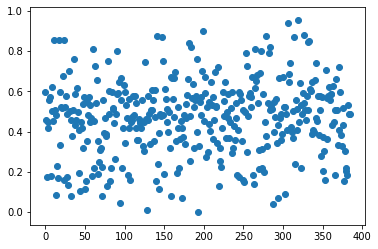

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

x_range = range(0,385)
#plt.scatter(actuals, predictions)
g=plt.scatter(x_range, actuals)


#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
#g.axes.set_xlabel('True Values ')
#g.axes.set_ylabel('Predictions ')
#g.axes.axis('equal')
#g.axes.axis('square')

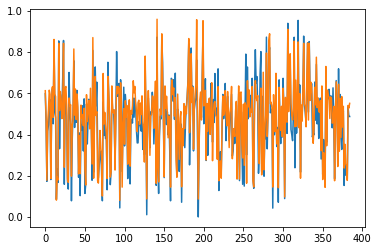

In [28]:
fig, ax = plt.subplots()
ax.plot(x_range,actuals)
ax.plot(x_range,predictions)


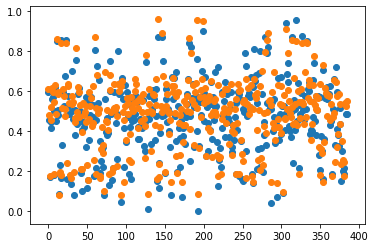

In [29]:
fig, ax = plt.subplots()
ax.scatter(x_range,actuals)
ax.scatter(x_range,predictions)

In [30]:
#r2 and mse

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(actuals, predictions)
r2 = r2_score(actuals, predictions)
print(f'Mean squared error: {mse.round(3)} \nr2: {r2.round(3)}')

Mean squared error: 0.005 
r2: 0.858


In [31]:
#["YrBlt", "Beds", "FBths", "LvngAreaSF","HBths", "Days On Market", "Garage", "Sold Price/List Price", "Sub#"]
test_input = [1990, 4 , 3, 4000, 1, 10, 2, 1, 56]


#normalize inputs
test_input_normal = (test_input-x_min)/(x_max-x_min)
#convert to tf array
array = tf.reshape(test_input_normal, [-1,9])
print(array)
print('____________________')


#run model
output = model.predict(array)
print(output)
print('____________________')


#unnormalize for final reports
Normal_output = output*(y_max-y_min)+y_min
Normal_output

tf.Tensor(
[[0.98514851 0.66666667 0.66666667 0.9198628  0.5        0.03921569
  0.66666667 0.5483871  1.        ]], shape=(1, 9), dtype=float64)
____________________
[[1.1041224]]
____________________


array([[472800.2]], dtype=float32)

In [32]:
#save model
model.save("townhome_model.h5")
